<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n250.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

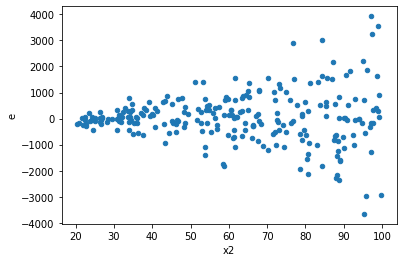

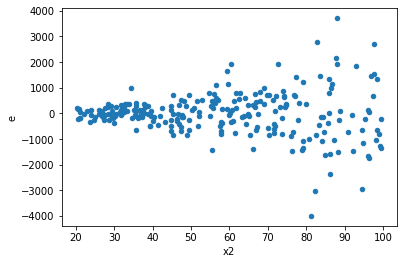

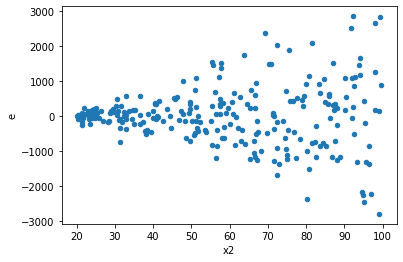

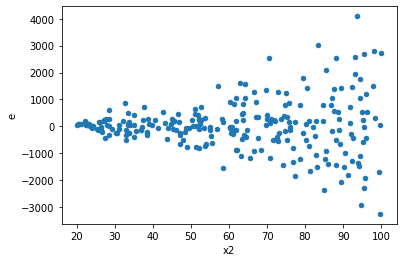

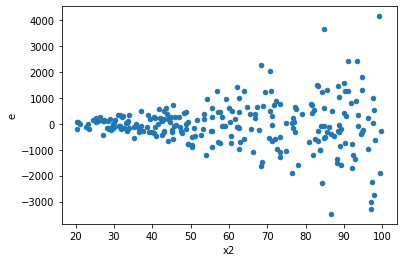

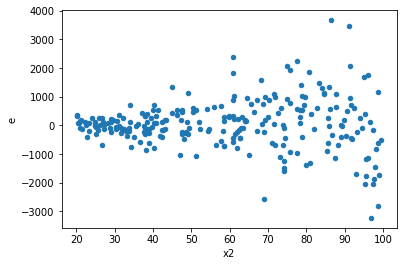

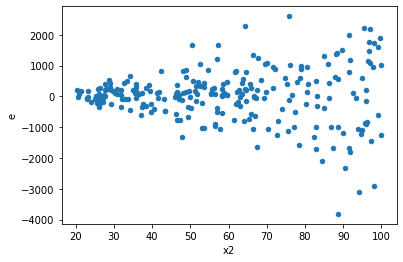

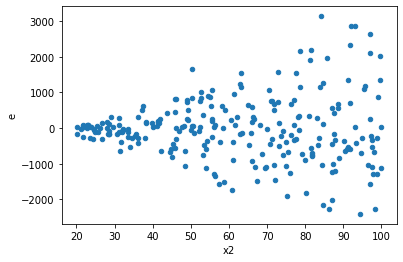

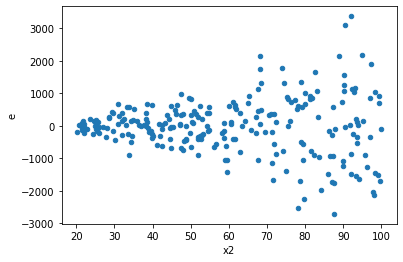

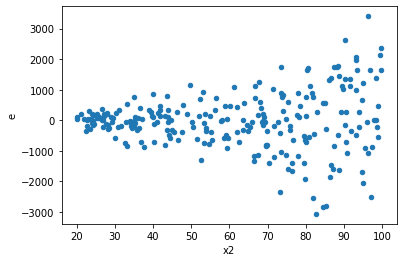

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,16816701.17512035,183626258.4892146,175173.97057417032,1912773.5259293187,10.919279386428205,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,8315743.347293616,142627380.98029992,86622.32653430851,1485701.8852114575,17.151489051994183,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,9220600.771994608,135801873.26758826,96047.92470827716,1414602.8465373777,14.728093822265281,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,9255315.527217384,183622533.79084668,96409.53674184775,1912734.7269879861,19.839683828267376,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,9356332.075715384,164452181.2575233,97461.79245536857,1713043.5547658678,17.576565252997323,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,12098086.817662284,131680941.00319508,126021.73768398212,1371676.468783282,10.884443382481843,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,14873775.160638366,139013580.65112394,154935.15792331632,1448058.131782541,9.346220387881514,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,15613795.468958095,141325832.8760058,162643.7028016468,1472144.0924583937,9.05134393216414,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,11839036.573766371,152277159.54506406,123323.2976433997,1586220.4119277506,12.862293193897946,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,16816701.17512035,183626258.4892146,175173.97057417032,1912773.5259293187,10.919279386428205,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,8315743.347293616,142627380.98029992,86622.32653430851,1485701.8852114575,17.151489051994183,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,9220600.771994608,135801873.26758826,96047.92470827716,1414602.8465373777,14.728093822265281,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,9255315.527217384,183622533.79084668,96409.53674184775,1912734.7269879861,19.839683828267376,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,9356332.075715384,164452181.2575233,97461.79245536857,1713043.5547658678,17.576565252997323,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,12098086.817662284,131680941.00319508,126021.73768398212,1371676.468783282,10.884443382481843,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,14873775.160638366,139013580.65112394,154935.15792331632,1448058.131782541,9.346220387881514,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,15613795.468958095,141325832.8760058,162643.7028016468,1472144.0924583937,9.05134393216414,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,11839036.573766371,152277159.54506406,123323.2976433997,1586220.4119277506,12.862293193897946,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64